<a href="https://colab.research.google.com/github/ibadrather/Data_Analysis_Python/blob/master/sexual_reproduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1337)

In [2]:
# parameters of the model
num_alleles = 64
num_genes = 100
mutation_rate = 0.05
num_pop = 1000
ratio_survive = 0.2
num_epochs = 200

In [3]:
# fitness matrix for each gene for each allele
F = np.random.randn(num_genes, num_alleles)

In [4]:
# example chromosome: just an array of allele identities for each gene
chromosome = np.random.randint(0, num_alleles, num_genes)
chromosome

array([ 9, 60, 44, 26, 41, 21, 47, 59, 18,  2, 56, 48, 30, 49, 17, 61,  7,
       15, 30, 16, 56,  3, 20, 29, 37,  2, 46, 31, 50,  8, 45, 56, 24, 41,
       14,  0, 29, 40, 43, 44, 32, 18, 40, 35, 44, 37, 13, 17, 17, 35, 63,
       46, 14, 55, 12,  9, 45, 45, 21, 39, 19, 57, 22, 47, 42,  4,  2, 20,
        3, 40, 42, 54,  3, 31, 43, 10, 63, 30, 39, 29, 30, 54, 52,  3, 48,
       22, 56, 33, 49, 41, 29, 15, 30, 20, 27, 45, 43,  6, 54, 41])

In [5]:
def mutate(ch):
  # randomly mutate some parts of chromosome
  m = np.random.rand(*ch.shape) <= mutation_rate
  return np.where(m, np.random.randint(0, num_alleles, ch.shape), ch)
mutate(chromosome)

array([ 9, 46, 44, 26, 41, 21, 47, 59, 55,  2, 57, 48, 30, 49, 17, 61,  7,
       15, 30, 16, 56,  3, 20, 29, 37,  2, 46, 31, 50,  8, 45, 56, 24, 41,
       14,  0, 29, 40, 43, 44, 32, 18, 40, 35, 44, 37, 13, 17, 17, 35, 63,
       32, 14, 55, 12,  9, 45, 45, 21, 39, 19, 57, 22, 47, 42,  4,  2, 20,
        3, 40, 42, 54,  3, 31, 43, 10, 63, 30, 39, 29, 30, 54, 52,  3, 48,
       22, 56, 33, 49, 41, 29, 15, 30, 20, 27, 45, 43,  6, 54, 41])

In [6]:
def crossover(ch1, ch2):
  # randomly mix parts of two chromosomes
  m = np.random.rand(*ch1.shape) < 0.5
  return np.where(m, ch1, ch2)
crossover(mutate(chromosome), mutate(chromosome))

array([ 9, 63, 44, 26, 41, 21, 47, 59, 18,  2, 56, 48, 30, 49, 17, 61,  7,
       15, 30, 16, 56,  3, 20, 29, 37,  2, 46, 31, 14,  8, 45, 56, 24, 41,
       14,  0, 29, 40, 43, 44, 32, 18, 40, 35, 44, 37, 13, 17, 17, 35, 63,
       46, 14, 35, 12,  9, 45, 45, 21, 39, 19, 57, 22, 47, 42,  4,  2,  2,
       57, 40, 42, 54,  3, 31, 43, 10, 63, 30, 39, 29, 30, 54, 52,  3, 48,
       22, 56, 33, 49, 41, 29, 15, 30, 20, 27, 45, 43,  6, 54, 41])

In [7]:
seed_chromosome = np.random.randint(0, num_alleles, (1, num_genes))
pop = mutate(np.repeat(seed_chromosome, num_pop, axis=0))
pop.shape # num_pop x num_genes

(1000, 100)

In [8]:
# asexual reproduction model
asexual = []
pop = mutate(np.repeat(seed_chromosome, num_pop, axis=0))
for i in range(num_epochs):
  # eval and log current population fitness
  fit = F[range(num_genes), pop].mean(1)
  asexual.append(float(np.mean(fit)))
  # survive the most fit organisms
  ix = np.argsort(fit)[::-1]
  nsurv = int(ratio_survive * num_pop)
  surv = pop[ix[:nsurv]]
  # reproduce a new generation via mutation of random surviving organisms
  repix = np.random.randint(0, nsurv, num_pop - nsurv)
  children = mutate(pop[repix])
  pop = np.concatenate((surv, children))

In [9]:
# sexual reproduction model
sexual = []
pop = mutate(np.repeat(seed_chromosome, num_pop, axis=0))
for i in range(num_epochs):
  # eval and log current population fitness
  fit = F[range(num_genes), pop].mean(1)
  sexual.append(float(np.mean(fit)))
  # survive the most fit organisms
  ix = np.argsort(fit)[::-1]
  nsurv = int(ratio_survive * num_pop)
  surv = pop[ix[:nsurv]]
  # reproduce a new generation via crossover + mutation of two parents
  repix1 = np.random.randint(0, nsurv, num_pop - nsurv)
  repix2 = np.random.randint(0, nsurv, num_pop - nsurv)
  children = mutate(crossover(pop[repix1], pop[repix2]))
  pop = np.concatenate((surv, children))

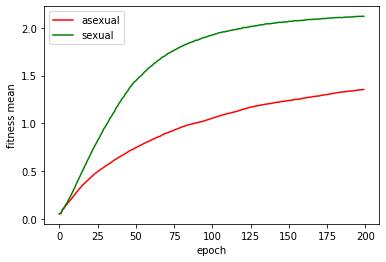

In [10]:
plt.plot(asexual, '-r')
plt.plot(sexual, '-g')
plt.legend(['asexual', 'sexual'])
plt.ylabel('fitness mean')
plt.xlabel('epoch');

In [ ]:
# :O